<a href="https://colab.research.google.com/github/jagdishdatascintist/jagdish_aiml/blob/main/twitter_2_imp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords  # Import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Define stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

df_train = pd.read_csv('/content/drive/MyDrive/Twitter Dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Twitter Dataset/test.csv')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#', '', text)      # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                 # Convert to lowercase
    return text

In [ ]:
df_train['cleaned_text'] = df_train['text'].apply(clean_text)

In [ ]:
df_train['cleaned_text'].head()

,cleaned_text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...


In [ ]:
train_data = train[['id', 'keyword', 'location', 'cleaned_text', 'target']]


In [ ]:
train_data.head()

,id,keyword,location,cleaned_text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [ ]:
train = train_data.dropna()

In [ ]:
train.isnull().sum()

,0
id,0
keyword,0
location,0
cleaned_text,0
target,0


In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#', '', text)      # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                 # Convert to lowercase
    return text

In [ ]:
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

In [ ]:
df_test['cleaned_text'].head()

,cleaned_text
0,just happened a terrible car crash
1,heard about earthquake is different cities sta...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills 28 in china and taiwan


In [ ]:
test_data = df_test[['id', 'keyword', 'location', 'cleaned_text']]


In [ ]:
test_data.head()

,id,keyword,location,cleaned_text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan


In [ ]:
test = test_data.dropna()

In [ ]:
test.isnull().sum()

,0
id,0
keyword,0
location,0
cleaned_text,0


In [ ]:
print(train.shape)
print(test.shape)

(5080, 5)
(2158, 4)


In [ ]:
print(train.shape)
print(test.shape)

(5080, 5)
(2158, 4)


In [ ]:
train.head()

,id,keyword,location,cleaned_text,target
31,48,ablaze,Birmingham,wholesale markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0


In [ ]:

test.head()

,id,keyword,location,cleaned_text
15,46,ablaze,London,birmingham wholesale market is ablaze bbc news...
16,47,ablaze,Niall's place | SAF 12 SQUAD |,will you wear shorts for race ablaze
17,51,ablaze,NIGERIA,previouslyondoyintv toke makinwaûªs marriage c...
18,58,ablaze,Live On Webcam,check these out nsfw
19,60,ablaze,"Los Angeles, Califnordia",psa iûªm splitting my personalities\n\n techie...


In [ ]:
train.isnull().any()
test.isnull().any()

,0
id,False
keyword,False
location,False
cleaned_text,False


In [ ]:
# checking out the negative comments from the train set

train[train['target'] == 0].head(10)

,id,keyword,location,cleaned_text,target
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
36,54,ablaze,Pretoria,mufc theyve built so much hype around new acq...,0
39,57,ablaze,Paranaque City,ablaze for you lord d,0
40,59,ablaze,Live On Webcam,check these out nsfw,0
42,62,ablaze,milky way,had an awesome time visiting the cfc head offi...,0
48,68,ablaze,Live On Webcam,check these out nsfw,0
49,71,ablaze,England.,first night with retainers in its quite weird ...,0
52,76,ablaze,Barbados,santa cruz ûó head of the st elizabeth police ...,0


In [ ]:

# checking out the postive comments from the train set

train[train['target'] == 1].head(10)

,id,keyword,location,cleaned_text,target
31,48,ablaze,Birmingham,wholesale markets ablaze,1
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
37,55,ablaze,World Wide!!,inec office in abia set ablaze,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",how the west was burned thousands of wildfires...,1
50,73,ablaze,"Sheffield Township, Ohio",deputies man shot before brighton home set abl...,1
51,74,ablaze,India,man wife get six years jail for setting ablaze...,1
53,77,ablaze,Anaheim,police arsonist deliberately set black church ...,1
55,79,ablaze,USA,kurds trampling on turkmen flag later set it a...,1
56,80,ablaze,South Africa,truck ablaze r21 voortrekker ave outside or t...,1
59,83,ablaze,"Edmonton, Alberta - Treaty 6",how the west was burned thousands of wildfires...,1


<Axes: xlabel='target'>

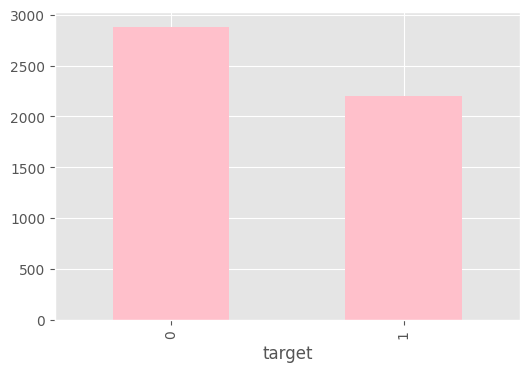

In [ ]:

train['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

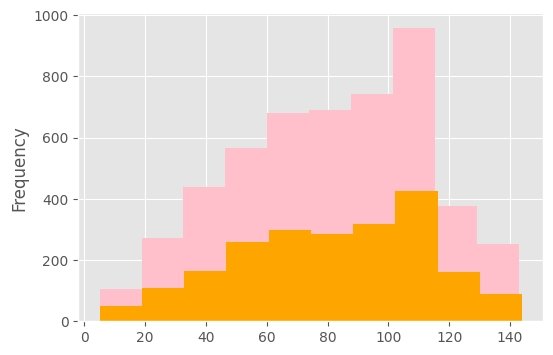

In [ ]:

# checking the distribution of tweets in the data

length_train = train['cleaned_text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['cleaned_text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:

# adding a column to represent the length of the tweet

train['len'] = train['cleaned_text'].str.len()
test['len'] = test['cleaned_text'].str.len()

train.head(10)

<ipython-input-48-fa7805c19c91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['len'] = train['cleaned_text'].str.len()
<ipython-input-48-fa7805c19c91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['len'] = test['cleaned_text'].str.len()


,id,keyword,location,cleaned_text,target,len
31,48,ablaze,Birmingham,wholesale markets ablaze,1,26
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0,42
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1,56
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0,33
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0,54
36,54,ablaze,Pretoria,mufc theyve built so much hype around new acq...,0,108
37,55,ablaze,World Wide!!,inec office in abia set ablaze,1,32
39,57,ablaze,Paranaque City,ablaze for you lord d,0,21
40,59,ablaze,Live On Webcam,check these out nsfw,0,24
42,62,ablaze,milky way,had an awesome time visiting the cfc head offi...,0,117


In [ ]:


train.groupby('target').describe()


id                                                           \
         count         mean          std   min     25%     50%      75%   
target                                                                    
0       2884.0  5307.596047  3151.027623  49.0  2555.0  5291.5  8056.50   
1       2196.0  5537.807377  3066.044846  48.0  3011.5  5487.5  8133.25   

                    len                                                       
            max   count       mean        std  min   25%   50%    75%    max  
target                                                                        
0       10833.0  2884.0  77.728155  32.675943  5.0  53.0  79.0  105.0  143.0  
1       10823.0  2196.0  85.040073  28.198519  9.0  63.0  87.0  109.0  141.0

In [ ]:

print(train.dtypes)
train['target'] = pd.to_numeric(train['target'], errors='coerce')

train['len'] = train['cleaned_text'].str.len()


id               int64
keyword         object
location        object
cleaned_text    object
target           int64
len              int64
dtype: object


<ipython-input-55-be7090d3c065>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] = pd.to_numeric(train['target'], errors='coerce')
<ipython-input-55-be7090d3c065>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['len'] = train['cleaned_text'].str.len()


In [ ]:
train.groupby('len').mean()['target'].plot.hist(color='black', figsize=(6, 4))
plt.title('Variation of Length')
plt.xlabel('Length')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
words = cv.fit_transform(train['cleaned_text'])



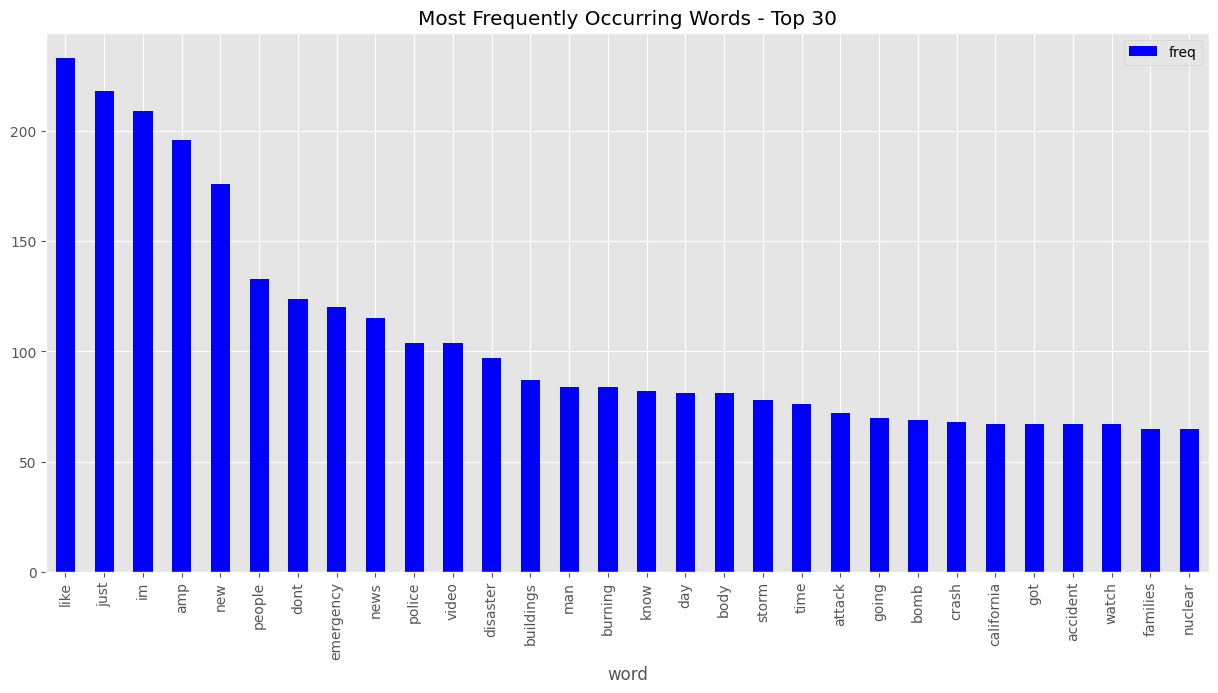

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train['cleaned_text'])  # Replace 'text' with the correct column name if needed

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
plt.title("Most Frequently Occurring Words - Top 30")
plt.show()



Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

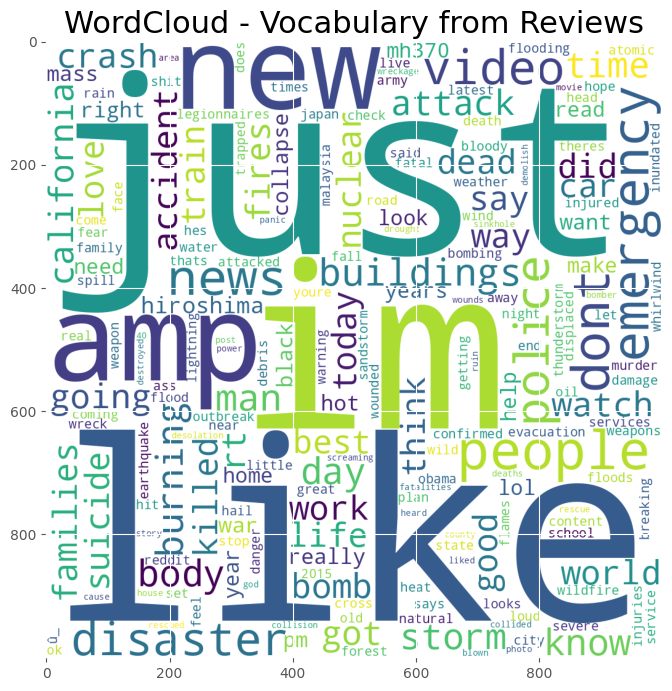

In [ ]:

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

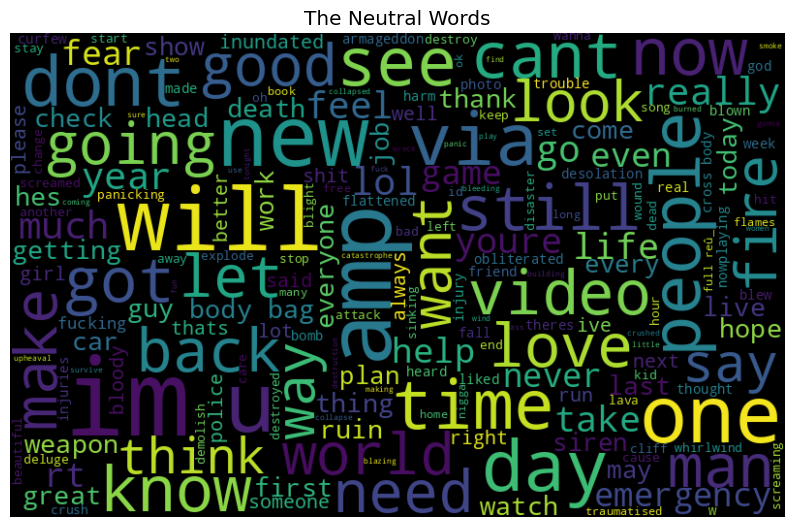

In [ ]:

normal_words =' '.join([text for text in train['cleaned_text'][train['target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

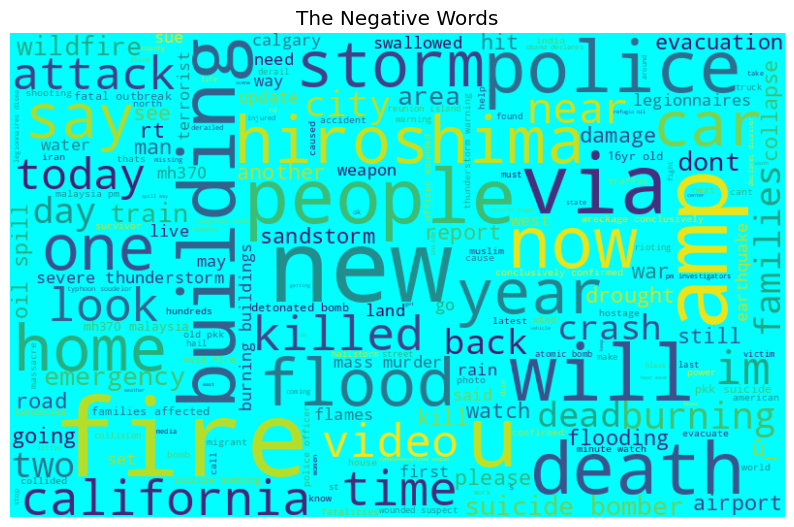

In [ ]:
negative_words =' '.join([text for text in train['cleaned_text'][train['target'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [ ]:
import re

# collecting the hashtags

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['cleaned_text'][train['target'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['cleaned_text'][train['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])


In [ ]:
# Import the nltk module
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenizing the words present in the training set
tokenized_tweet = train['cleaned_text'].apply(lambda x: x.split())

# Importing gensim
from gensim.models import Word2Vec

# Creating a word-to-vector model
model_w2v = Word2Vec(
    tokenized_tweet,
    vector_size=200,  # Use vector_size instead of size
    window=5,         # Context window size
    min_count=2,      # Minimum frequency for a word to be included
    sg=1,             # 1 for skip-gram model
    hs=0,             # Hierarchical softmax disabled
    negative=10,      # Number of negative samples
    workers=2,        # Number of cores
    seed=34           # Seed for reproducibility
)

# Training the Word2Vec model
model_w2v.train(tokenized_tweet, total_examples=len(train['cleaned_text']), epochs=20)


(1053548, 1407320)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

[('note', 0.8676844835281372),
 ('strongly', 0.8500357866287231),
 ('cancers', 0.8457956910133362),
 ('jan', 0.8441474437713623),
 ('rey', 0.8439352512359619),
 ('tons', 0.8407772183418274),
 ('bubble', 0.8403952121734619),
 ('various', 0.8371632099151611),
 ('equate', 0.8358331322669983),
 ('esh', 0.8351151347160339)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

[('increased', 0.8238034248352051),
 ('peaceful', 0.7440457344055176),
 ('generation', 0.7434313893318176),
 ('humanity', 0.7363128662109375),
 ('human', 0.730147659778595),
 ('groups', 0.7278818488121033),
 ('experienced', 0.7232609391212463),
 ('paints', 0.7208012938499451),
 ('environmental', 0.7139086723327637),
 ('jr', 0.7106637358665466)]

In [ ]:
model_w2v.wv.most_similar(positive = "street")

[('wmur9', 0.8112167119979858),
 ('manchester', 0.8045685291290283),
 ('evacuating', 0.8009414076805115),
 ('nh', 0.7802474498748779),
 ('vermont', 0.7767317891120911),
 ('2nd', 0.770466148853302),
 ('apartment', 0.7664413452148438),
 ('3alarm', 0.7658042907714844),
 ('several', 0.7612365484237671),
 ('blake', 0.7530299425125122)]

In [ ]:
model_w2v.wv.most_similar(negative = "crash")

[('show', 0.02729773335158825),
 ('we', 0.005288138519972563),
 ('world', 0.0016355399275198579),
 ('how', -0.010050452314317226),
 ('off', -0.019130272790789604),
 ('phone', -0.0205197986215353),
 ('up', -0.020576236769557),
 ('will', -0.02932565100491047),
 ('dust', -0.03148870915174484),
 ('back', -0.03482034057378769)]

In [ ]:

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")


from gensim.models.doc2vec import TaggedDocument


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# Importing TaggedDocument
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        # Replace LabeledSentence with TaggedDocument
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

# Assuming tokenized_tweet is a Pandas Series
# Label all the tweets
labeled_tweets = add_label(tokenized_tweet)

# Display first 6 labeled tweets
print(labeled_tweets[:6])


[TaggedDocument(words=['wholesale', 'markets', 'ablaze'], tags=['tweet_31']), TaggedDocument(words=['we', 'always', 'try', 'to', 'bring', 'the', 'heavy', 'metal', 'rt'], tags=['tweet_32']), TaggedDocument(words=['africanbaze', 'breaking', 'newsnigeria', 'flag', 'set', 'ablaze', 'in', 'aba'], tags=['tweet_33']), TaggedDocument(words=['crying', 'out', 'for', 'more', 'set', 'me', 'ablaze'], tags=['tweet_34']), TaggedDocument(words=['on', 'plus', 'side', 'look', 'at', 'the', 'sky', 'last', 'night', 'it', 'was', 'ablaze'], tags=['tweet_35']), TaggedDocument(words=['mufc', 'theyve', 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'i', 'doubt', 'they', 'will', 'set', 'the', 'epl', 'ablaze', 'this', 'season'], tags=['tweet_36'])]


In [ ]:

# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []

for i in range(len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train.iloc[i]['cleaned_text'])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming and removing stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # Joining back with space
    review = ' '.join(review)
    train_corpus.append(review)



In [ ]:

# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(5080, 2500)
(5080,)


In [ ]:
test_corpus = []
for i in range(len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test.iloc[i]['cleaned_text'])  # Using .iloc for position-based access
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    review = ' '.join(review)
    test_corpus.append(review)




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(2158, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3810, 2500)
(1270, 2500)
(3810,)
(1270,)


In [ ]:

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

from sklearn.metrics import f1_score, confusion_matrix

# Check if y_valid and y_pred have the same shape
print(f"y_valid shape: {y_valid.shape}")
print(f"y_pred shape: {y_pred.shape}")

# If working with multiclass labels, use the 'average' parameter
f1 = f1_score(y_valid, y_pred, average='macro')  # Use 'macro' for multiclass
print(f"F1 score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy : 0.9926509186351706
Validation Accuracy : 0.7149606299212599
y_valid shape: (1270,)
y_pred shape: (1270,)
F1 score: 0.6888835144118829
Confusion Matrix:
[[4 0 1 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 1]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 3 0 2]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1 score for multiclass classification
print("F1 score:", f1_score(y_valid, y_pred, average='macro'))  # Use 'micro' or 'weighted' if preferred

# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9929133858267717
Validation Accuracy : 0.6267716535433071
F1 score: 0.6165373660183436
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 1]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 2 0 3]]


In [ ]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))




Training Accuracy : 0.9929133858267717
Validation Accuracy : 0.6952755905511812


In [ ]:

from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))



Training Accuracy : 0.9283464566929134
Validation Accuracy : 0.37480314960629924


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels (y_train and y_valid)
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Now you can train the model
model = XGBClassifier()
model.fit(x_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(x_valid)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate model performance
print("Training Accuracy :", model.score(x_train, y_train_encoded))
print("Validation Accuracy :", model.score(x_valid, y_valid_encoded))

# F1 score for multiclass classification
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_valid_encoded, y_pred_encoded, average='macro'))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid_encoded, y_pred_encoded)
print("Confusion Matrix:")
print(cm)



Training Accuracy : 0.3270341207349081
Validation Accuracy : 0.22362204724409449
F1 score: 0.18196786776751997
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 5 0 0]]
